In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

In [2]:
data = pd.read_excel('./mt.xls',names=['user','comment','commenttime','userid','star','menu'])
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user         1539 non-null   object
 1   comment      1539 non-null   object
 2   commenttime  1539 non-null   int64 
 3   userid       1539 non-null   int64 
 4   star         1539 non-null   int64 
 5   menu         1398 non-null   object
dtypes: int64(3), object(3)
memory usage: 72.3+ KB


,user,comment,commenttime,userid,star,menu
0,meiki8182,菜品味道从来没让我失望过，环境更是一流，领孩子也跟舒适！将军牛排，九折板，那绝对是必点菜式，...,1653720234,4448597,50,仅售93元！价值100元将军牛排韩国餐厅代金券1张
1,bzE766087788,一直想着再来吃一次，今天终于来了。上菜速度一如既往的快，黑椒牛肉饭真的超好吃，不油不腻，梨大...,1654359586,977700597,50,特色4人套餐，提供免费WiFi
2,花自飘零372,喜欢吃他家食物，跟朋友经常去，喜欢杂酱面，拌饭，牛肉，鸡爪都是不错的海鲜饼也好吃，辣口的菜也...,1652168718,47117506,50,NaN
3,ncb888890627,芝士牛排：牛排硬口感不好，芝士也是一坨，可以说两者没什么关系\n大酱汤：味道可以\n铁板烤五...,1655339338,998032143,25,NaN
4,冯er冯,「#套餐：4 人餐A」「#韩国辣鸡爪」「#招牌将军牛排」\n【口味】一如既往的好吃 推荐鸡爪...,1652082061,324047631,45,4人餐A，提供免费WiFi
...,...,...,...,...,...,...
1534,pvs516170844,还行吧。 酒挺好喝的。 就是有点贵。,1563086818,236643988,50,双人套餐A，提供免费WiFi
1535,她的笑脸.,还行 挺好吃的 和朋友去的,1561624650,262408800,40,双人套餐A，提供免费WiFi
1536,匿名用户,味道一般，没有以前好吃，口味淡,1563027704,0,20,仅售93元！价值100元将军牛排韩国餐厅代金券1张
1537,LV沐女良,还可以，环境不错,1562920462,74734490,40,仅售93元！价值100元将军牛排韩国餐厅代金券1张


### 项目思路
0 user 1539 non-null object 用户分析

1 comment 1539 non-null object 评价分析

2 commenttime 1539 non-null int64 销售量分析

3 userid 1539 non-null int64 用户分析

4 star 1539 non-null int64 评价分析

5 menu 1398 non-null object 套餐销售分析

### 用户分析的建议（饼状图）
1.可以以用户的消费次数入手

2.用户的月两次购买客户或n次 （绘制饼状图）计算回购率与复购率等销售指标。

---

---
### 复购率定义
#### 1、按照用户计算： 在某时间窗口内重复消费用户（消费两次及以上的用户）在总消费用户中占比
重复消费用户的定义，又分为两种：

（1）按天非去重，即一个用户一天产生多笔付款交易，则算重复消费用户。

（2）按天去重，即一个用户一天产生多笔交易付款，只算一次消费，除非在统计周期内另外一天也有消费，才算重复消费用户。
#### 2、按照交易计算： 在某时间串口内重复消费交易次数在总交易次数中占比


### 回购率定义
是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。

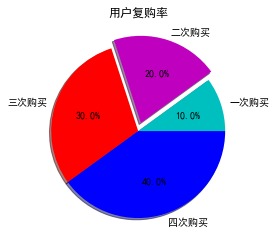

In [6]:
plt.rcParams['font.family']= ['SimHei']#设置中文字体

#各种活动标题列表
activies = ['一次购买','二次购买','三次购买','四次购买']

#各种活动所占时间列表

slices = [1,2,3,4]

#各种活动在饼状图中的颜色列表

clos = ['c','m','r','b']

plt.pie(slices,labels=activies,colors=clos,shadow=True,explode=(0,0.1,0,0),autopct='%.1f%%')

plt.title("用户复购率")
plt.show()

### 销售量分析的建议（折线图为主）

1.统计销售量

2.窗口期的问题 按天算 整体数据进行可视化反应的大的趋势

3.需要将时间戳数据转换为时间字符串数据

4.按时间轴划分

In [16]:
total_show = pd.read_excel('./mt.xls',names=['user'])


,,,,,user
meiki8182,菜品味道从来没让我失望过，环境更是一流，领孩子也跟舒适！将军牛排，九折板，那绝对是必点菜式，鸡爪味道稍微偏淡，但是里面年糕很好吃，寿司惊艳了，串串味道一般，儿童套餐的小米粥里放肉松宝贝的最爱，辣白菜米酒更是让你心里得劲,1653720234,4448597,50,仅售93元！价值100元将军牛排韩国餐厅代金券1张
bzE766087788,一直想着再来吃一次，今天终于来了。上菜速度一如既往的快，黑椒牛肉饭真的超好吃，不油不腻，梨大辣烧凤爪里还有年糕，凤爪很糯很入味，粒米牛排也超棒，送的米酒也不错，度数不高，记得上次点的冷面也很好吃，这次直接点的4人套餐，4个人没吃完，分量很足！！,1654359586,977700597,50,特色4人套餐，提供免费WiFi
花自飘零372,喜欢吃他家食物，跟朋友经常去，喜欢杂酱面，拌饭，牛肉，鸡爪都是不错的海鲜饼也好吃，辣口的菜也挺好吃\n\n环境干净，服务不错\n还有小食领取，，推荐大家去品尝，团购优惠合适，外卖就不建议点面了，会软，拌饭还挺好，,1652168718,47117506,50,NaN
ncb888890627,芝士牛排：牛排硬口感不好，芝士也是一坨，可以说两者没什么关系\n大酱汤：味道可以\n铁板烤五花肉：可以直接用难吃来形容了\n铁板豆腐：都不如中国的麻婆豆腐好吃\n海鲜饼：好吃\n服务：进门和上菜服务员特别礼貌，点餐服务员一般\n环境：去过很多次了，这次地址变了，环境可以,1655339338,998032143,25,NaN
冯er冯,「#套餐：4 人餐A」「#韩国辣鸡爪」「#招牌将军牛排」\n【口味】一如既往的好吃 推荐鸡爪冷面和牛排\n【环境】环境一般 人比较多 座位比较近 没有私密性\n【服务】服务比较好 服务员都会很细心的帮忙上菜\n【性价比】价格实惠 菜量都比较大,1652082061,324047631,45,4人餐A，提供免费WiFi
...,...,...,...,...,...
pvs516170844,还行吧。 酒挺好喝的。 就是有点贵。,1563086818,236643988,50,双人套餐A，提供免费WiFi
她的笑脸.,还行 挺好吃的 和朋友去的,1561624650,262408800,40,双人套餐A，提供免费WiFi
匿名用户,味道一般，没有以前好吃，口味淡,1563027704,0,20,仅售93元！价值100元将军牛排韩国餐厅代金券1张
LV沐女良,还可以，环境不错,1562920462,74734490,40,仅售93元！价值100元将军牛排韩国餐厅代金券1张


### 评价分析的建议（词云图）

1.字符串处理去除无语义的词汇或者符号 （字符串处理时难点）针对难点给定技术建议（1.去停用词、字符串处理）

2.生成评价词云图表 （总词云） 消极词云（筛选评分25以下的用户进行评价词云展示）

### 套餐销售分析的建议（柱状图）

1.数据统计

2.柱状图可视化